<a href="https://colab.research.google.com/github/kannankumar/jupyter-notebooks/blob/mnist/MNIST_Digits_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits CNN

#### Classifying Images of Handwritten Digits

---

In this notebook, we train a CNN to classify images from a subset of the MNIST Dataset. This is the most basic Hello World of Deep Learning.

This is how the handwritten digits 


### 1. Load MNIST dataset

In [1]:
# import libraries
import keras
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

%matplotlib inline

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Size of input images
input_width, input_height = x_train[0].shape
print("Shape of images: ", (input_width, input_height) )

# Number of classes in labels
num_classes = len(set(y_train))
print("Number of classes: ", num_classes)

Shape of images:  (28, 28)
Number of classes:  10


### 2. Visualize the First 24 Training Images

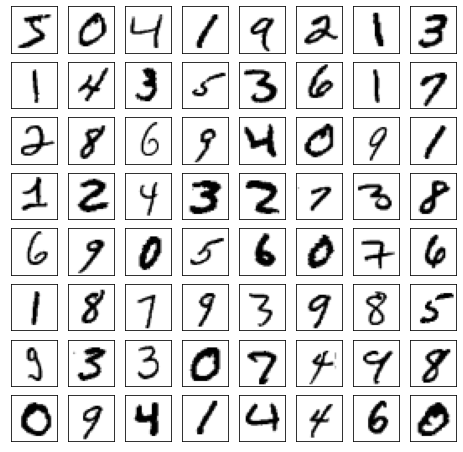

In [4]:
images = x_train[:64]

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(8, 8))
plot_size=8*8
for idx in np.arange(plot_size):
    ax = fig.add_subplot(8, 8, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx], cmap='binary')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    # ax.set_title(str(labels[idx].item()))

### 4.  Preprocess the Dataset

In [0]:
x_train = x_train.reshape(x_train.shape[0], input_height, input_width, 1)
x_test = x_test.reshape(x_test.shape[0], input_height, input_width, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 5. Define the Model Architecture 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(input_width, input_height, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)         

### 6. Compile the Model 

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [0]:
batch_size = 128
epochs = 10

In [10]:
from keras.callbacks import ModelCheckpoint   

# checkpoint can only be used with validation accuracy. 
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
60000/60000 [==============================] - 33s 558us/step - loss: 0.3181 - accuracy: 0.8973
Epoch 2/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.1132 - accuracy: 0.9646
Epoch 3/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.0840 - accuracy: 0.9737
Epoch 4/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0693 - accuracy: 0.9776
Epoch 5/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0597 - accuracy: 0.9813
Epoch 6/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.0536 - accuracy: 0.9830
Epoch 7/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.0488 - accuracy: 0.9848
Epoch 8/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0434 - accuracy: 0.9866
Epoch 9/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0423 - accuracy: 0.9868
Epoch 10/10
60000/60000 [============

In [0]:
model.save('mnist_digit_classification_model.h5')

### 8. Load the Model with the Best Validation Accuracy

In [0]:
# load the weights that yielded the best validation accuracy
# TODO: split train generator to train and valid

# model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [13]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 98.86999726295471


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
test_images = x_test[:32]
test_labels = y_test[:32]

y_hat = model.predict(test_images)

# define text labels for MNIST Digits
digit_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

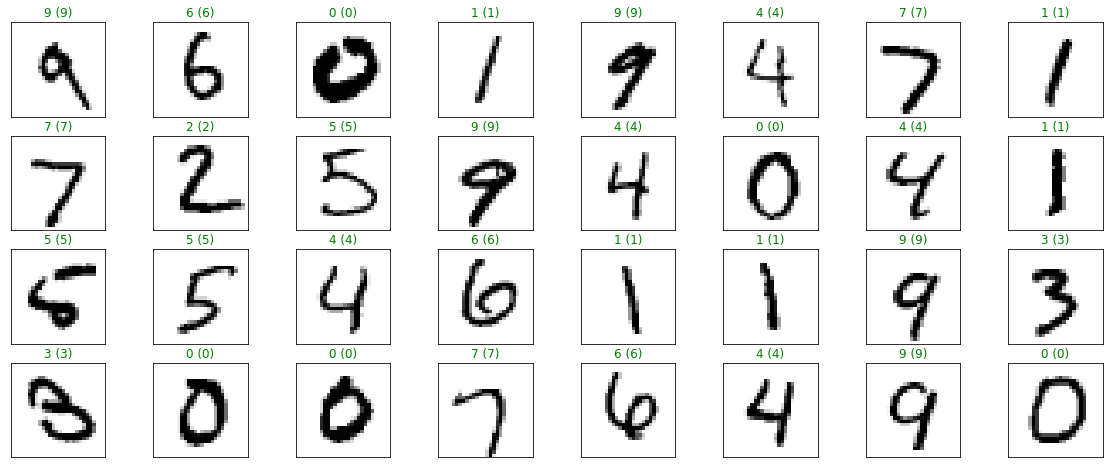

In [15]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]), cmap='binary')
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(digit_labels[pred_idx], digit_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))